## Name: Crystal Lau
## Date: 06/07/2018
## Challenge: Preparing a dataset for modeling

Assignment:
- select an outcome variable
- pick 4 or 5 other variables (one to two categorical, three to four continuous)
- explore variables using the univariate and bivariate methods
- create ten new features and explain reasoning behind each one
- use filtering methods to select the five best features and justify choices

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', thousands=',')

In [36]:
# preview of data
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


### Data Exploration

In [37]:
# columns and data types
df.dtypes

City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object

In [38]:
# renaming columns into workable titles without all the newline nonsense
df.columns = ['City', 'Population', 'Violent_Crime', 'Murder_Nonnegligent_Manslaughter',
              'Rape_1', 'Rape_2', 'Robbery', 'Aggravated_Assault', 'Property_Crime', 'Burglary',
              'Larceny_Theft', 'Motor_Vehicle_Theft', 'Arson']

In [39]:
# stripping whitespace
df.columns = df.columns.str.strip()

In [40]:
(df.isnull().sum()/df.shape[0])*100

City                                  0.000000
Population                            0.000000
Violent_Crime                         0.000000
Murder_Nonnegligent_Manslaughter      0.000000
Rape_1                              100.000000
Rape_2                                0.000000
Robbery                               0.000000
Aggravated_Assault                    0.000000
Property_Crime                        0.000000
Burglary                              0.000000
Larceny_Theft                         0.000000
Motor_Vehicle_Theft                   0.000000
Arson                                46.264368
dtype: float64

In [41]:
# dropping Rape_1 column because all NaN values and no data available for new definition
df.drop(['Rape_1'], axis=1, inplace=True)

In [42]:
df.fillna(0, inplace=True)

### Selecting variables

Categorical Variable:
- City

Continuous Variables:
- Population
- Violent_Crime
- Robbery
- Propety_Crime
- Larceny_Theft

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


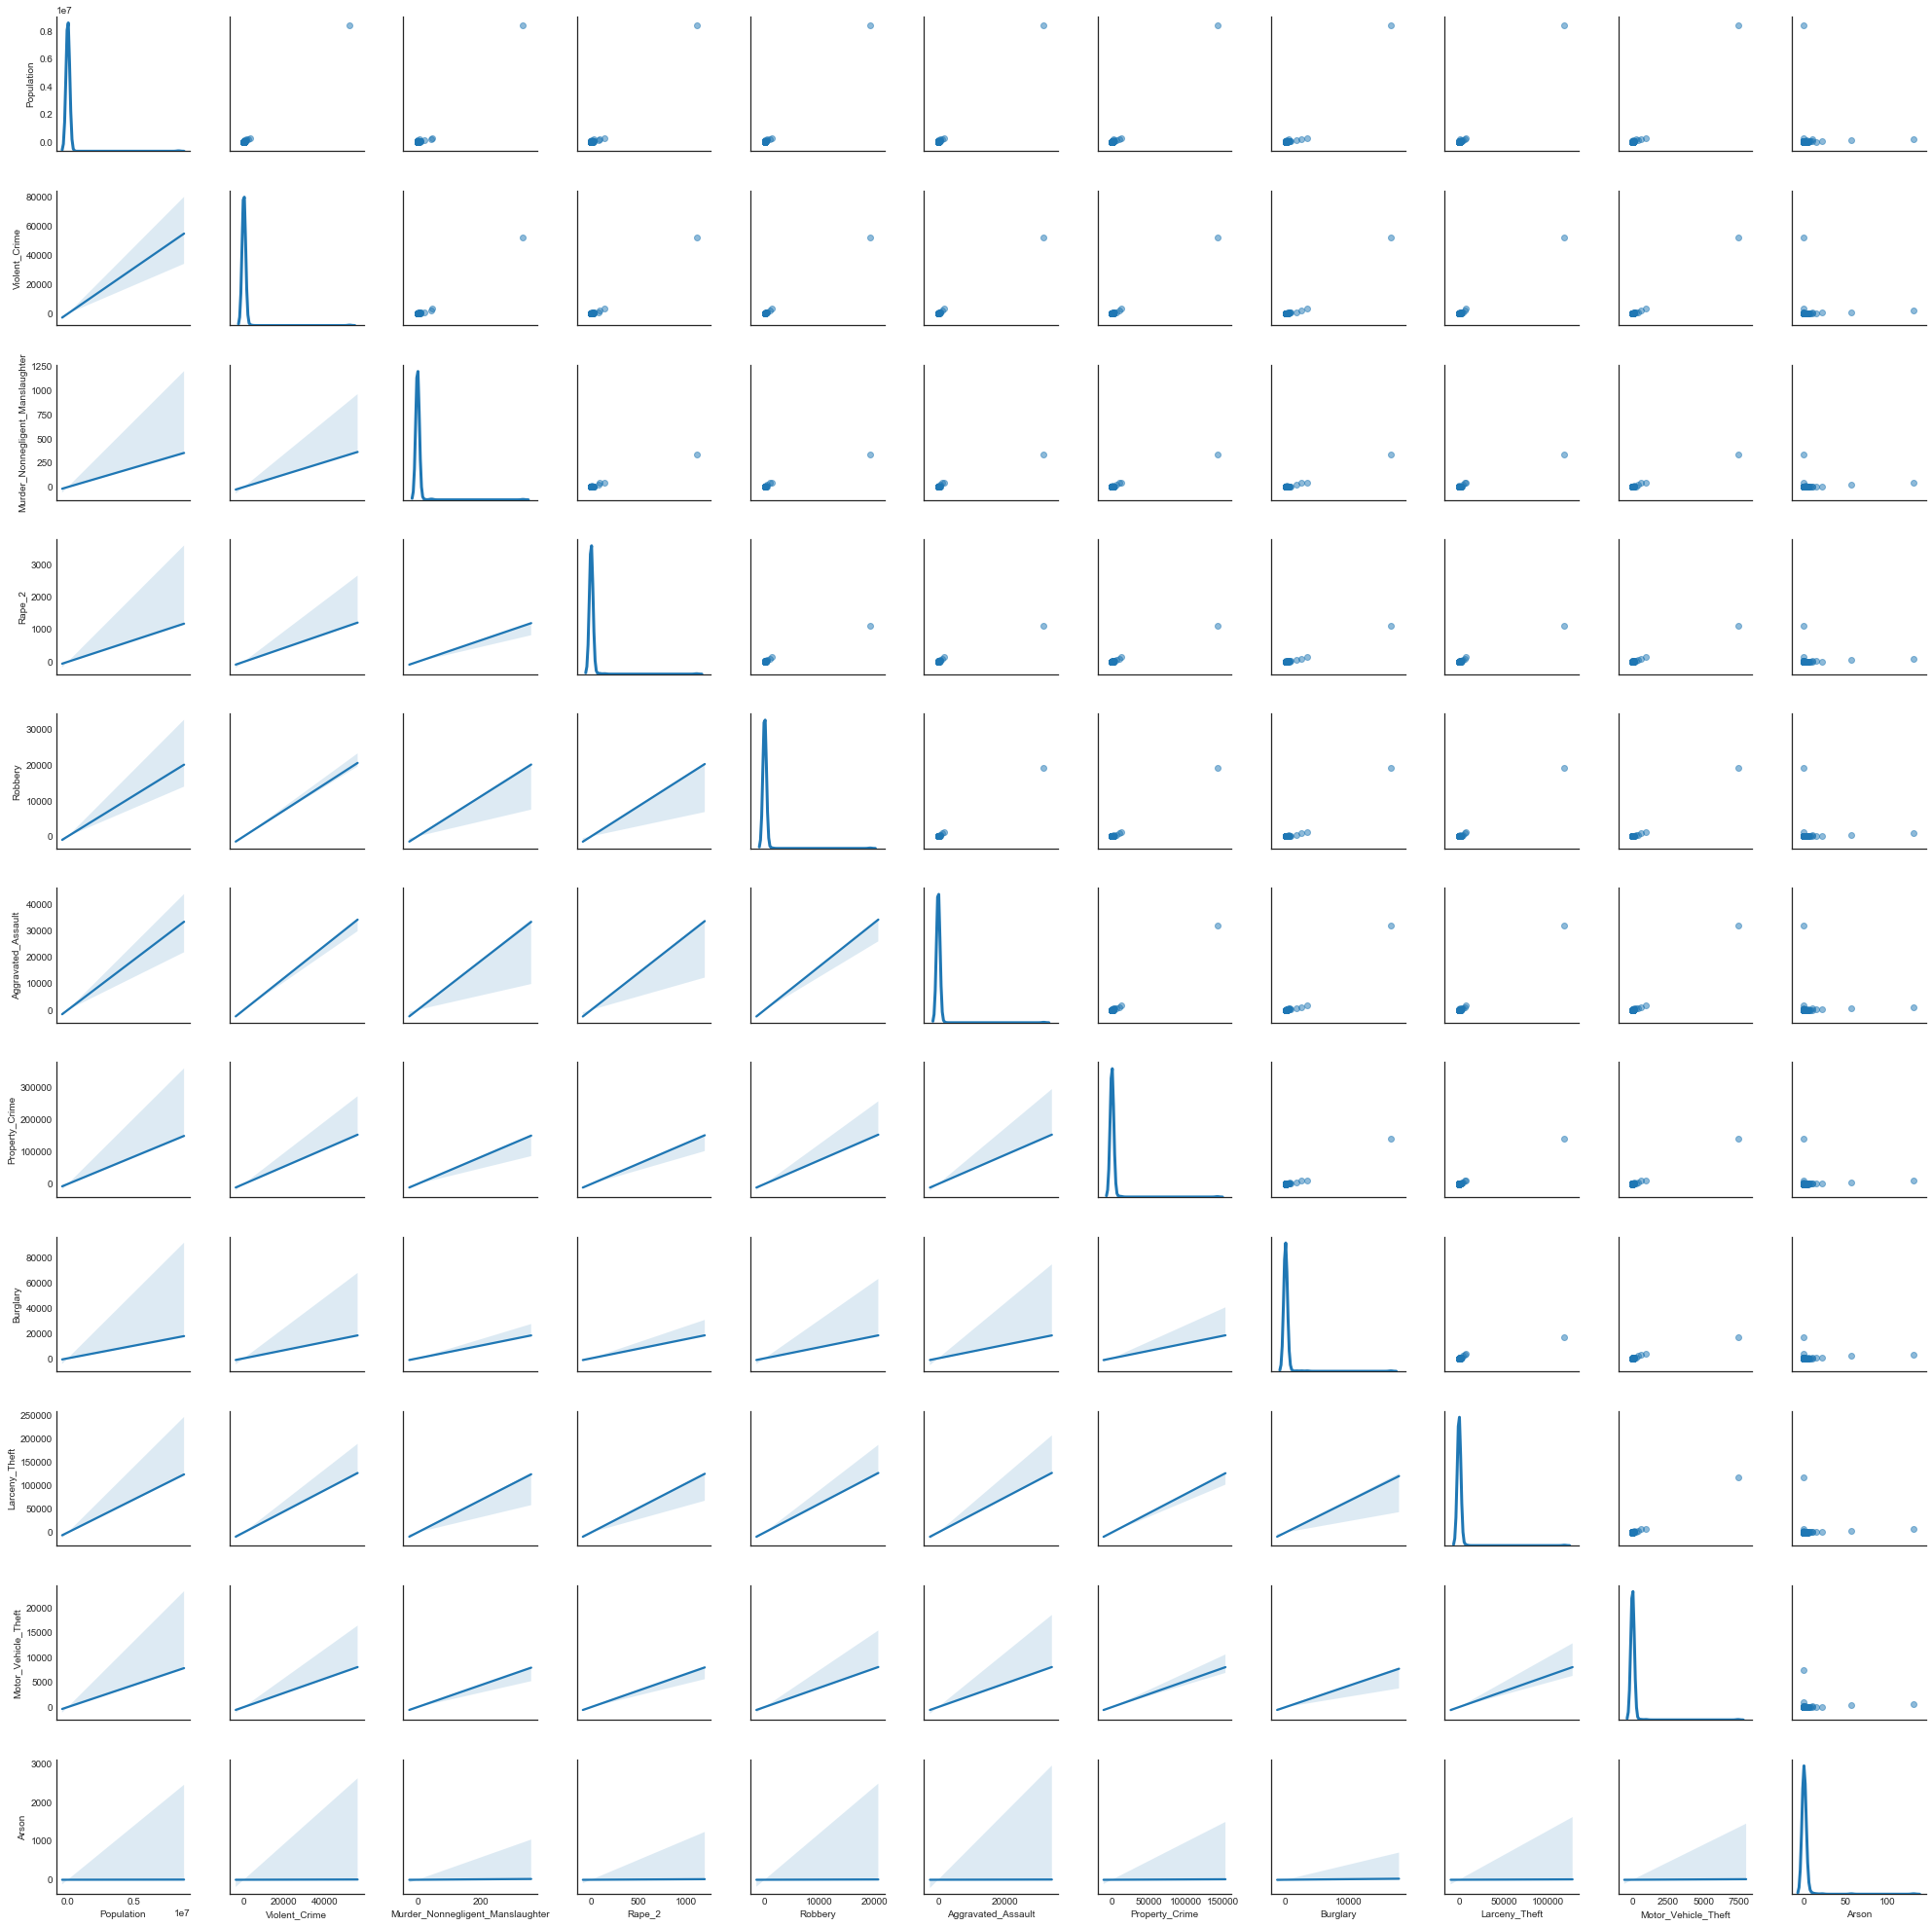

In [43]:
# making scatterplot matrix of variables
sns.set_style('white')

g = sns.PairGrid(df.drop(['City'], axis=1), diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()

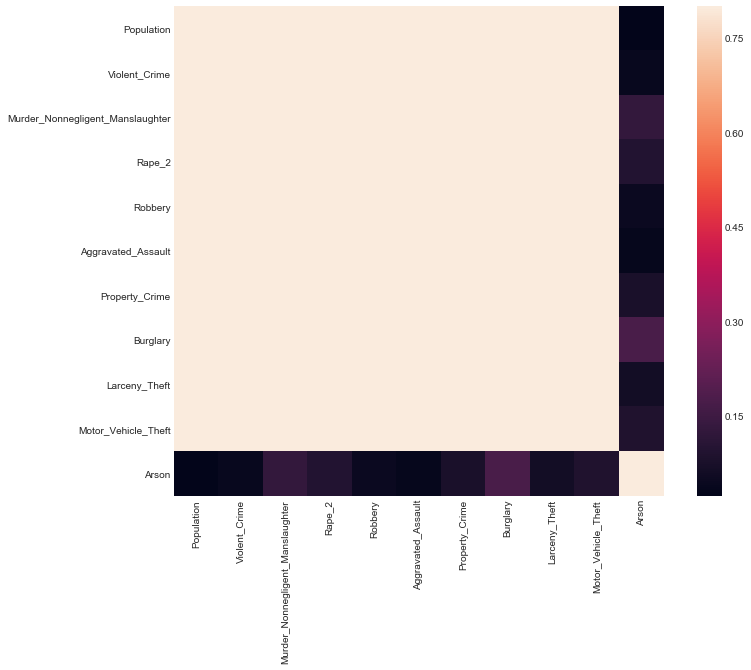

In [44]:
# heat map of correlation values
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Heat matrix doesn't show any strong correlations that stand out between the variables.

### Feature Engineering and PCA

In [45]:
sklearn_pca = PCA(n_components=11)
Y_sklearn = sklearn_pca.fit_transform(df.drop(['City'], axis=1))
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.99996639e-01 3.25388191e-06 8.01055803e-08 2.51232941e-08
 1.16098098e-09 3.93132611e-10 1.34732895e-10 3.56173721e-11
 2.71880441e-12 4.09545296e-37 8.44625724e-39]


### Filtering

In [46]:
# using variance threshold of 0.8 * (1 - .8)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df.drop(['City'], axis=1))

array([[1.86100e+03, 0.00000e+00, 0.00000e+00, ..., 1.00000e+01,
        0.00000e+00, 0.00000e+00],
       [2.57700e+03, 3.00000e+00, 0.00000e+00, ..., 2.00000e+01,
        1.00000e+00, 0.00000e+00],
       [2.84600e+03, 3.00000e+00, 0.00000e+00, ..., 1.50000e+01,
        0.00000e+00, 0.00000e+00],
       ...,
       [5.93100e+03, 2.00000e+00, 0.00000e+00, ..., 4.50000e+01,
        0.00000e+00, 0.00000e+00],
       [1.99134e+05, 1.03600e+03, 6.00000e+00, ..., 1.66200e+03,
        2.36000e+02, 1.00000e+01],
       [3.66430e+04, 1.50000e+01, 0.00000e+00, ..., 2.87000e+02,
        2.00000e+00, 0.00000e+00]])